In [8]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
from matplotlib import pyplot as plt

In [28]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler

In [9]:
data= pd.read_csv("countries.csv")

In [12]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


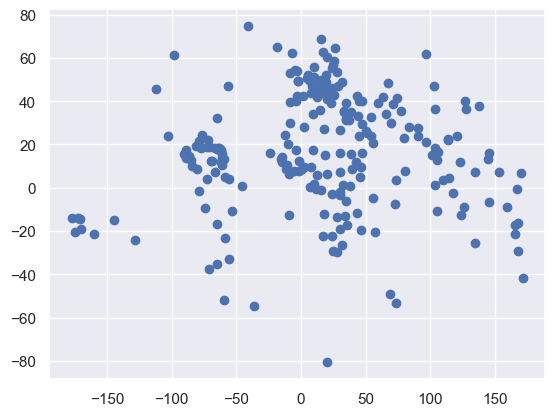

In [15]:
plt.scatter(data['Longitude'], data['Latitude'])

In [24]:
cluster_data= data.iloc[:,[1,2]]

In [26]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [31]:
ss = StandardScaler()

In [34]:
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [35]:
kmeans = KMeans(4)

In [36]:
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [37]:
identified_clusters = kmeans.fit_predict(cluster_data)


In [38]:
identified_clusters

array([0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 3, 2, 0, 3, 1, 1, 2, 1, 0, 0,
       3, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 3, 2, 2, 1, 2, 3, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 1, 3,
       1, 1, 3, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       3, 0, 3, 2, 0, 1, 0, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       3, 1, 1, 2, 1, 3, 0, 0, 3, 1, 1, 3, 1, 0, 1, 0, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 1, 2, 3, 0, 3, 1, 0, 1, 3, 1, 1, 3, 2, 0, 0, 2, 2, 3,
       2, 3, 1, 3, 0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 0, 0, 0, 3, 3, 3, 1, 0,
       3, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 3, 2, 2, 3, 0, 0, 1, 3,
       3, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 3, 1, 1, 3, 0, 0, 1,
       1, 3, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 2, 2, 2],
      dtype=int32)

In [39]:
new_data=data.copy()

In [40]:
new_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [41]:
new_data['clusterNo'] = identified_clusters

In [42]:
new_data.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


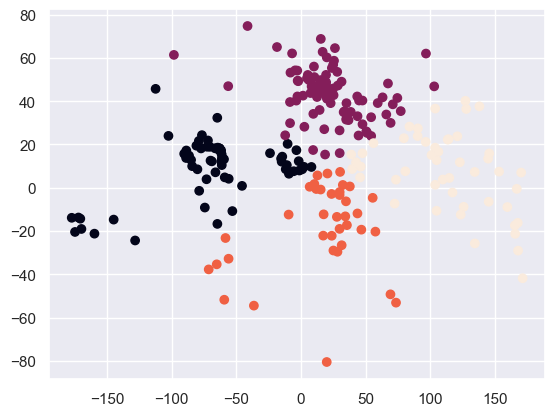

In [43]:
plt.scatter(new_data['Longitude'], new_data['Latitude'], c=new_data['clusterNo'])

In [44]:
wcss=[]
for i in range(1,11): 
   kmeans = KMeans(i)
   kmeans.fit(cluster_data) 
   wcss_iter = kmeans.inertia_ 
   wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

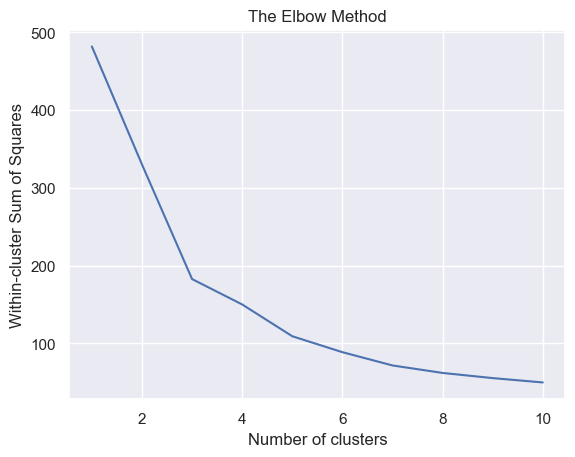

In [46]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')